### Libraries import

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import

In [51]:
df_data = pd.read_csv('customer_data.csv')
df_data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [52]:
df_data.shape

(100000, 12)

(rows, columns)

### Data pre-processing
##### Data Cleaning
- Find missing values and address them
- Drop columns not required
##### Data Formatting
- Convert data to appropriate data types

In [53]:
df_data.isna().all()

id                    False
age                   False
gender                False
income                False
education             False
region                False
loyalty_status        False
purchase_frequency    False
purchase_amount       False
product_category      False
promotion_usage       False
satisfaction_score    False
dtype: bool

In [54]:
df_data.isna().any()

id                    False
age                   False
gender                False
income                False
education             False
region                False
loyalty_status        False
purchase_frequency    False
purchase_amount       False
product_category      False
promotion_usage       False
satisfaction_score    False
dtype: bool

No null or missing values present, Data in appropriate format

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


checking the datatype for each column to make sure their in the appropriate format

In [56]:
df_data.duplicated().sum()

0

This shows that they are no duplicated values as the was supposed to add up the number of duplicated values

In [57]:
df_data.drop(columns = 'id', inplace = True)

Drop column 'id' since it is not required

In [58]:
df_data.head(3)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6


Create age_group column

In [59]:
df_data['age'].unique()

array([27, 29, 37, 30, 31, 38, 32, 24, 28, 35, 21, 33, 25, 22, 34, 36, 40,
       23, 39, 20, 26, 44, 19, 41, 18, 17, 42, 43, 45, 16, 15, 47, 13, 14,
       48, 46, 49, 12], dtype=int64)

In [60]:
def age_group (age):
    "Assign customer an age group based on their age"
    if 0<= age <=9:
        return '0-9'
    elif 10<= age <=19:
         return '10-19'
    elif 20<= age <=29:
         return '20-29'
    elif 30<= age <=39:
         return '30-39'
    elif 40<= age <=49:
         return '40-49'
    else:
         return '>=50'

In [61]:
df_data['age_group'] = df_data['age'].apply(age_group)

Rearrange columns

In [62]:
df_data.columns

Index(['age', 'gender', 'income', 'education', 'region', 'loyalty_status',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score', 'age_group'],
      dtype='object')

In [63]:
df_data = df_data[['age', 'age_group', 'gender', 'income', 'education', 'region', 'loyalty_status',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score']]

In [64]:
df_data.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


### Data Analysis and Visualization

Categories with the most customers

#### Visual 1: Bar Chart
- Plot the total sales per category and calculate the % each product category contributed to the overall malls' sales

In [65]:
sales_agg = df_data.groupby(['product_category']).size().reset_index()
sales_agg.rename(columns={0: 'total_sales'}, inplace = True)
sales_agg['percentage'] = (sales_agg['total_sales']/sum(sales_agg['total_sales'])) * 100

sales_agg.sort_values(by = 'percentage', ascending = False, inplace = True)
sales_agg.reset_index(drop = True)

,product_category,total_sales,percentage
0,Electronics,30027,30.027
1,Clothing,19989,19.989
2,Books,14925,14.925
3,Food,14822,14.822
4,Health,10123,10.123
5,Home,5079,5.079
6,Beauty,5035,5.035


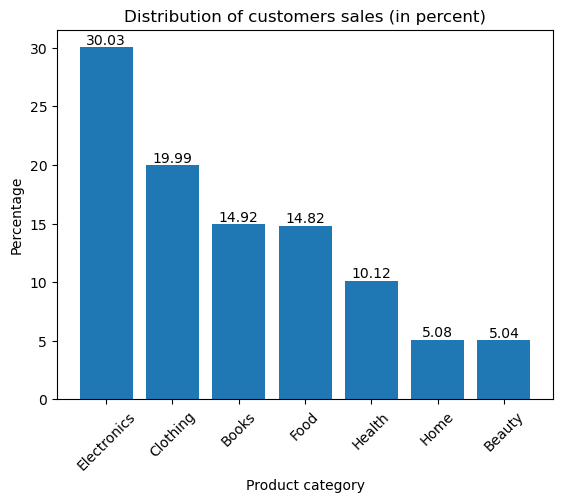

In [66]:
y_data = sales_agg['percentage']
x_data = sales_agg['product_category']

bar_per_sales = plt.bar(x_data, y_data)
plt.xticks(rotation=45)
plt.xlabel('Product category')
plt.ylabel('Percentage')
plt.bar_label(bar_per_sales, fmt='%.2f')
plt.title("Distribution of customers sales (in percent)")

plt.show()

#### Visual 2:
- Electronics had a 30.03% contribution to the total sales. Investigate it further starting with its type of customers(i.e loyalty_staus)

In [67]:
df_data.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [68]:
df_data_ele = df_data.loc[df_data['product_category'] == 'Electronics']
df_data_ele.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
5,38,30-39,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
11,32,30-39,Female,40044,Bachelor,North,Silver,rare,13608,Electronics,0,5
19,28,20-29,Male,40725,HighSchool,East,Regular,rare,12764,Electronics,1,6
23,27,20-29,Female,36226,College,North,Regular,frequent,12633,Electronics,1,4
25,22,20-29,Female,7915,College,West,Silver,frequent,2188,Electronics,0,6


In [69]:
# extract only electronics data
ele_loy = df_data_ele.groupby(['loyalty_status']).size().reset_index()
ele_loy.rename(columns = {0:'count'}, inplace = True)
ele_loy

,loyalty_status,count
0,Gold,2970
1,Regular,18037
2,Silver,9020


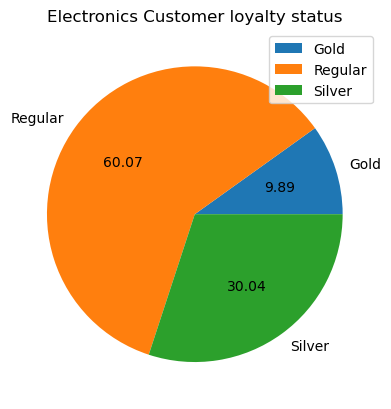

In [70]:
plt.pie(x = ele_loy['count'], labels = ele_loy['loyalty_status'], autopct='%.2f')
plt.legend()
plt.title('Electronics Customer loyalty status')
plt.show()

####  Visual 3
- Promotion usage in Electronic sales

In [71]:
df_data_ele.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
5,38,30-39,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
11,32,30-39,Female,40044,Bachelor,North,Silver,rare,13608,Electronics,0,5
19,28,20-29,Male,40725,HighSchool,East,Regular,rare,12764,Electronics,1,6
23,27,20-29,Female,36226,College,North,Regular,frequent,12633,Electronics,1,4
25,22,20-29,Female,7915,College,West,Silver,frequent,2188,Electronics,0,6


In [72]:
df_data_ele['promotion_usage'].sum()

9025

In [73]:
ele_promo = df_data_ele.groupby(['promotion_usage']).size().reset_index()
ele_promo.rename(columns = {0:'total_purchases'}, inplace = True)
ele_promo

,promotion_usage,total_purchases
0,0,21002
1,1,9025


9025 sales was due to promotion usage

In [74]:
ele_promo.replace({'promotion_usage': {0: 'No', 1: 'Yes'}}, inplace = True)

Replace numbers in promotion usage with Yes and No

In [75]:
ele_promo

,promotion_usage,total_purchases
0,No,21002
1,Yes,9025


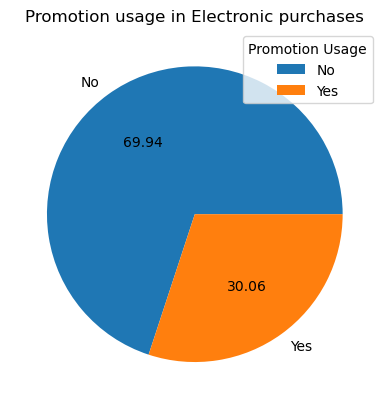

In [76]:
plt.pie(x = ele_promo['total_purchases'], labels = ele_promo['promotion_usage'], autopct='%.2f')
plt.title('Promotion usage in Electronic purchases')
plt.legend(ele_promo['promotion_usage'], title = 'Promotion Usage')
plt.show()

#### Visual 4:
- Correlation and Heat map

In [77]:
df_data.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [78]:
# Drop columns with categorical values
corr_df = df_data.drop(columns = ['age_group', 'gender', 'education', 'region', 'purchase_frequency', 'product_category', 'loyalty_status'])
corr_df.head()

,age,income,purchase_amount,promotion_usage,satisfaction_score
0,27,40682,18249,0,6
1,29,15317,4557,1,6
2,37,38849,11822,0,6
3,30,11568,4098,0,7
4,31,46952,19685,1,5


                         age    income  purchase_amount  promotion_usage  \
age                 1.000000 -0.002365        -0.002089         0.001932   
income             -0.002365  1.000000         0.948441         0.000756   
purchase_amount    -0.002089  0.948441         1.000000         0.001156   
promotion_usage     0.001932  0.000756         0.001156         1.000000   
satisfaction_score  0.000977  0.002780         0.003424         0.000330   

                    satisfaction_score  
age                           0.000977  
income                        0.002780  
purchase_amount               0.003424  
promotion_usage               0.000330  
satisfaction_score            1.000000  


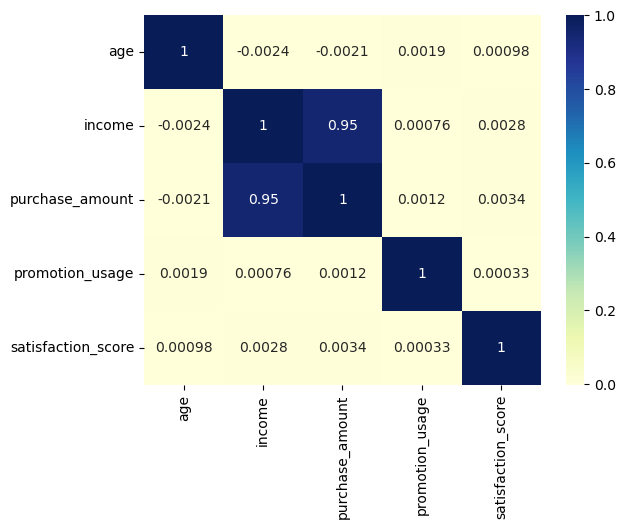

In [79]:
print(corr_df.corr())

sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From this heat map we can see there is a strong correlation between **income** and **purchase_amount** (0.95), let's investigate that

#### Visual 5
- Scatter plot

In [80]:
df_data.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


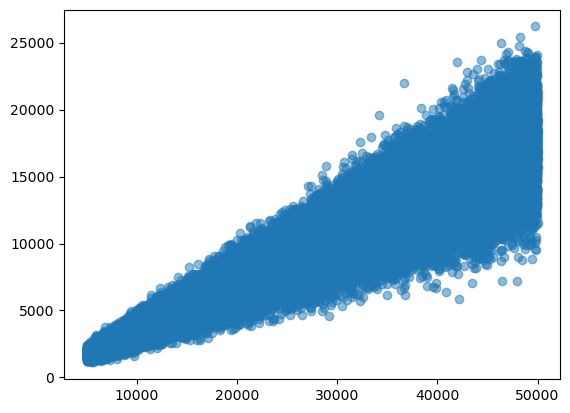

In [81]:
# Investigate the type of correlation between both these columns
x = df_data['income']
y = df_data['purchase_amount']

plt.scatter(x, y, alpha=0.5)

plt.show()

Take a sample since it is big data

In [82]:
df_sample = df_data.sample(1000)

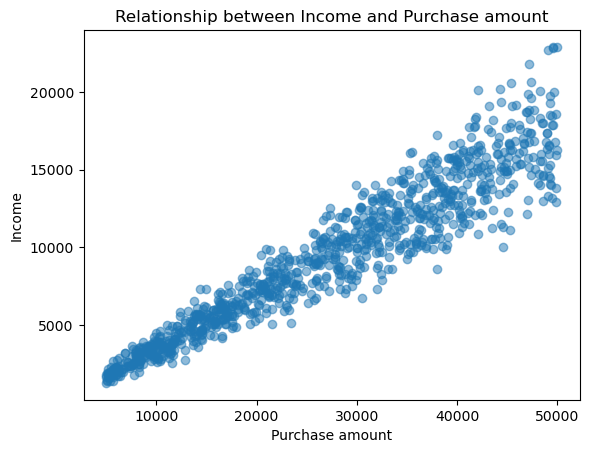

In [83]:
x = df_sample['income']
y = df_sample['purchase_amount']

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Purchase amount')
plt.ylabel('Income')

plt.title('Relationship between Income and Purchase amount')

plt.show()

We can see a positive correlation here, meaning that as Income increases the purchase amount increases

#### Visual 6
- Customer income distribution

In [84]:
df_data.head()

,age,age_group,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


Create income brackets

In [85]:
def income_group(income):
    """ Place income into groups """
    if income < 10000:
        return '0 - 9,999'
    elif 10000<= income < 20000:
        return '10,000 - 19,999'
    elif 20000<= income < 30000:
        return '20,000 - 29,999'
    elif 30000<= income < 40000:
        return '30,000 - 39,999'
    elif 40000<= income < 50000:
        return '40,000 - 49,999'
    elif 50000<= income < 60000:
        return '50,000 - 59,999'

In [86]:
df_data['income_group'] = df_data['income'].apply(income_group)

In [87]:
# Rearrange columns
df_data = df_data[['age', 'age_group', 'gender', 'income', 'income_group','education', 'region',
                   'loyalty_status', 'purchase_frequency', 'purchase_amount',
                   'product_category', 'promotion_usage', 'satisfaction_score']]

In [88]:
df_data.head(3)

,age,age_group,gender,income,income_group,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,"40,000 - 49,999",Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,"10,000 - 19,999",Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,"30,000 - 39,999",Bachelor,West,Silver,rare,11822,Clothing,0,6


In [89]:
income_data = df_data.groupby(['income_group']).size().reset_index()
# Since 50,000-59,999 has only one value it will be dropped
income_data = income_data.query("income_group != '50,000 - 59,999'")
income_data['percent'] = (income_data[0]/sum(income_data[0])) *100
income_data

,income_group,0,percent
0,"0 - 9,999",11194,11.194112
1,"10,000 - 19,999",22049,22.049220
2,"20,000 - 29,999",22090,22.090221
3,"30,000 - 39,999",22480,22.480225
4,"40,000 - 49,999",22186,22.186222


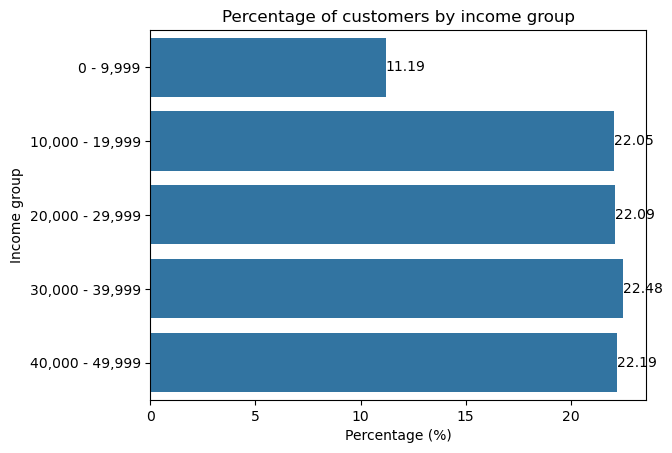

In [90]:
ax_3 = sns.barplot(x = income_data['percent'], y = income_data['income_group'])
plt.ylabel('Income group')
plt.xlabel('Percentage (%)')
plt.title('Percentage of customers by income group')

ax_3.bar_label(ax_3.containers[0], fmt='%.2f')
plt.show()

#### Visual 7
- Which region do customers come from

In [91]:
df_data.head()

,age,age_group,gender,income,income_group,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,"40,000 - 49,999",Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,"10,000 - 19,999",Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,"30,000 - 39,999",Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,"10,000 - 19,999",HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,"40,000 - 49,999",College,North,Regular,occasional,19685,Clothing,1,5


In [92]:
region_data = df_data.groupby(['region']).size().reset_index()
region_data

,region,0
0,East,30074
1,North,19918
2,South,20073
3,West,29935


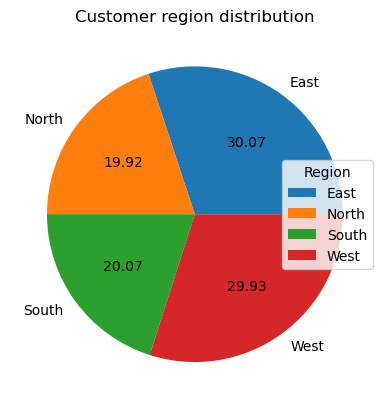

In [93]:
plt.pie(x = region_data[0], labels = region_data['region'], autopct='%.2f')
plt.title('Customer region distribution')
plt.legend(region_data['region'], title = 'Region', loc=7) # 7 represents centre right
plt.show()

#### Visual 8
- Which category attracted the most males

In [94]:
df_data.head()

,age,age_group,gender,income,income_group,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,20-29,Male,40682,"40,000 - 49,999",Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,20-29,Male,15317,"10,000 - 19,999",Masters,West,Regular,rare,4557,Clothing,1,6
2,37,30-39,Male,38849,"30,000 - 39,999",Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,30-39,Male,11568,"10,000 - 19,999",HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,30-39,Female,46952,"40,000 - 49,999",College,North,Regular,occasional,19685,Clothing,1,5


In [95]:
male_df = df_data.loc[df_data['gender'] == 'Male']
male_prod = male_df.groupby(['product_category']).size().reset_index()
male_prod['percent'] = (male_prod[0]/sum(male_prod[0])) * 100
male_prod

,product_category,0,percent
0,Beauty,2572,5.151624
1,Books,7493,15.008212
2,Clothing,9930,19.889436
3,Electronics,14950,29.944318
4,Food,7361,14.743821
5,Health,5065,10.145015
6,Home,2555,5.117574


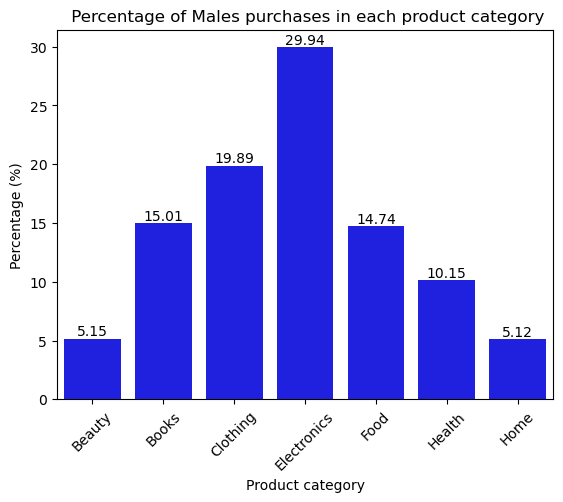

In [96]:
ax = sns.barplot(x = male_prod['product_category'], y = male_prod['percent'], color='blue')

plt.xlabel('Product category')
plt.ylabel('Percentage (%)')
plt.title(" Percentage of Males purchases in each product category")

plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

#### Visual 9

In [97]:
fem_df = df_data.loc[df_data['gender'] == 'Female']
fem_prod = fem_df.groupby(['product_category']).size().reset_index()
fem_prod['percent'] = (fem_prod[0]/sum(fem_prod[0])) * 100
fem_prod

,product_category,0,percent
0,Beauty,2463,4.918720
1,Books,7432,14.842034
2,Clothing,10059,20.088269
3,Electronics,15077,30.109438
4,Food,7461,14.899948
5,Health,5058,10.101050
6,Home,2524,5.040540


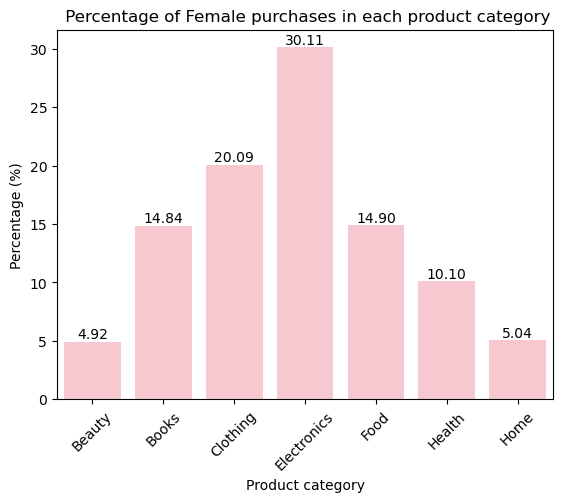

In [98]:
ax_1 = sns.barplot(x = fem_prod['product_category'], y = fem_prod['percent'], color='pink')

plt.xlabel('Product category')
plt.ylabel('Percentage (%)')
plt.title(" Percentage of Female purchases in each product category")

plt.xticks(rotation=45)
ax_1.bar_label(ax_1.containers[0], fmt='%.2f')
plt.show()